In [86]:
import kagglehub

path = kagglehub.dataset_download("kenny3s/casia-webface")

print("Path to dataset files:", path)
path=path+"/datasets"

Path to dataset files: /root/.cache/kagglehub/datasets/kenny3s/casia-webface/versions/1


In [87]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [88]:
def load_images(path):
    images = []
    labels = []
    counter = 0

    for label in os.listdir(path):
        folder_path = os.path.join(path, label)

        # Skip if not a directory
        if not os.path.isdir(folder_path):
            continue

        if len(os.listdir(folder_path)) < 350:
            continue
        else:
            for img in os.listdir(folder_path):
                image_path = os.path.join(folder_path, img)

                # Skip if the file is not an image
                if not os.path.isfile(image_path):
                    continue

                image = cv.imread(image_path)
                if image is None:  # Skip corrupted or unreadable files
                    print(f"Skipping {image_path}, image not loaded.")
                    continue

                image = cv.resize(image, (64, 64))  # Resize all images to a fixed size
                images.append(image)
                labels.append(label)

            counter += 1
            if counter == 51:
                break

    return np.array(images), np.array(labels), counter


In [98]:
image, label,counter= load_images(path)

In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [99]:
image_n=image/255
for i in range(0,2):
  mean=np.mean(image_n[:,:,:,i])
  std=np.std(image_n[:,:,:,i])
  image_n[:,:,:,i]=(image_n[:,:,:,i]-mean)/std

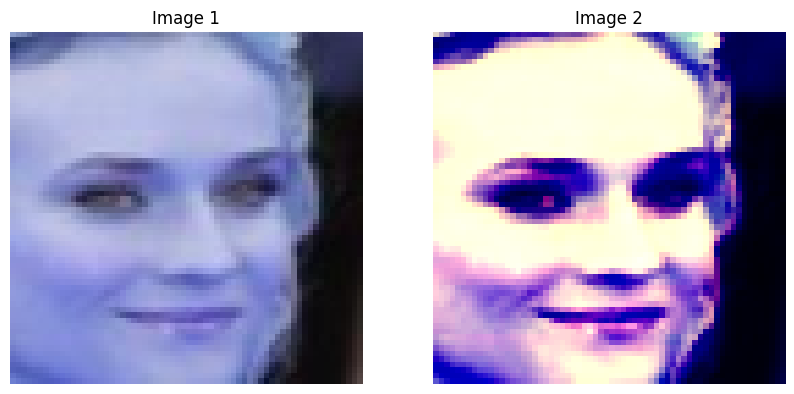

In [92]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image[0])
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_n[0])
plt.title("Image 2")
plt.axis('off')

plt.show()

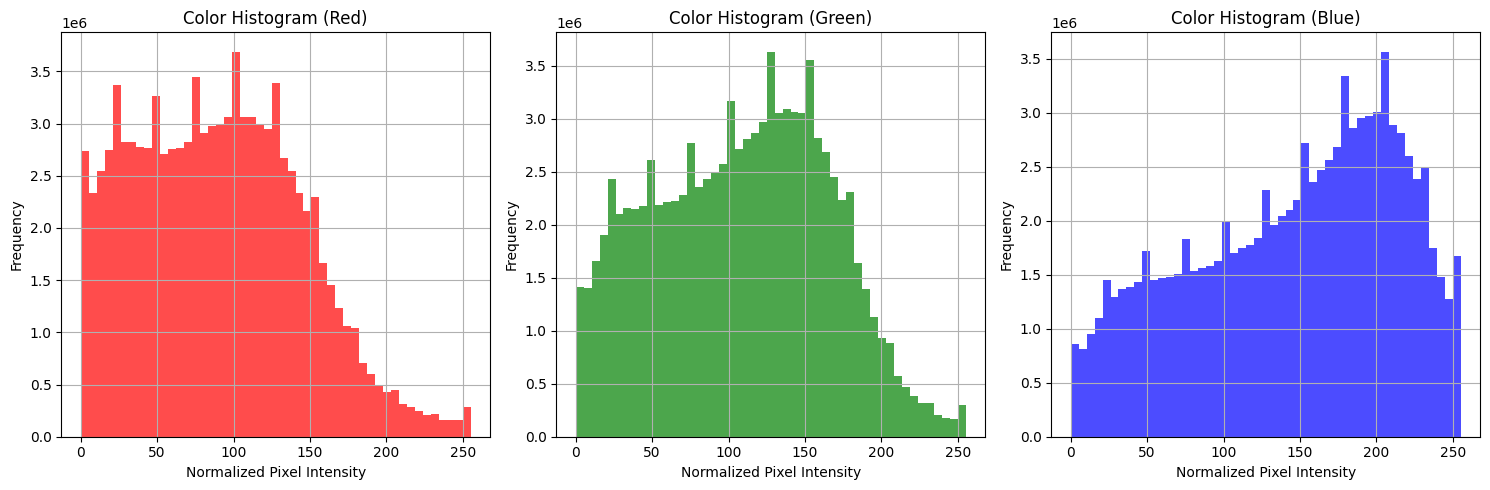

In [123]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



# Split the channels
channels = ('Red', 'Green', 'Blue')
colors = ('r', 'g', 'b')

# prompt: plot color histogram for image_n which may have negative numbers

import matplotlib.pyplot as plt

# Assuming image_n is already defined and normalized

# Define bins for the histogram. Adjust range as needed for negative values.
bins = np.linspace(0, 255, 50)  # Example: 50 bins from -2 to 2

plt.figure(figsize=(15, 5))

for i in range(3):  # Iterate through RGB channels
    plt.subplot(1, 3, i + 1)

    # Flatten the image channel and create histogram
    plt.hist(image[..., i].flatten(), bins=bins, color=colors[i], alpha=0.7)

    plt.title(f'Color Histogram ({channels[i]})')
    plt.xlabel('Normalized Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


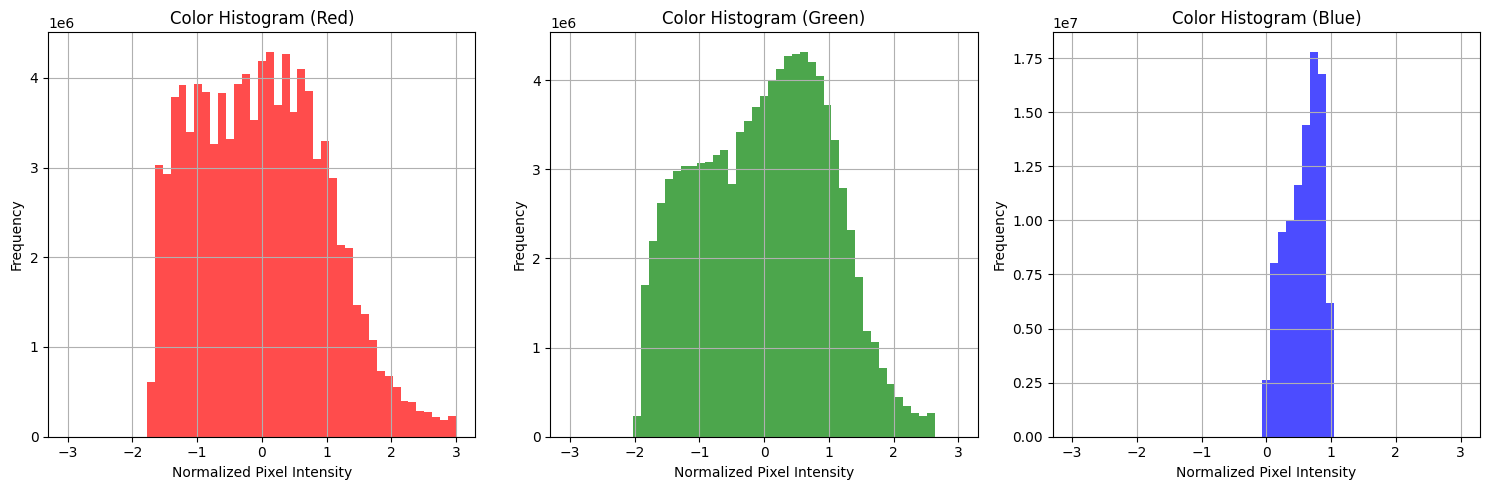

In [125]:
# prompt: plot color histogram for image_n which may have negative numbers

import matplotlib.pyplot as plt

# Assuming image_n is already defined and normalized

# Define bins for the histogram. Adjust range as needed for negative values.
bins = np.linspace(-3, 3, 50)  # Example: 50 bins from -2 to 2

plt.figure(figsize=(15, 5))

for i in range(3):  # Iterate through RGB channels
    plt.subplot(1, 3, i + 1)

    # Flatten the image channel and create histogram
    plt.hist(image_n[..., i].flatten(), bins=bins, color=colors[i], alpha=0.7)

    plt.title(f'Color Histogram ({channels[i]})')
    plt.xlabel('Normalized Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()